# Airbnb Listings: Price Analysis

## Project overview
In this project, I will analyze the Airbnb Open Data to explore factors influencing Airbnb listing prices and extract insights through visualizations. \
Source: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

## Import required libraries and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(r'D:\REGINA\DA DS\airbnb_listings\Airbnb_Open_Data.csv', low_memory=False)

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Project plan
- There are 26 columns. I will clean the column names and drop some irrelevant columns, such as id, name, host id, host name, last review, house rules, license, etc., for the price analysis.
- I will handle null values by filling numerical columns with the median and categorical columns with the mode.
- I will convert data types: making price and service_fee as floats.
- I will detect any outliers in the dataset.
- I will analyze the factors affecting price.
- I will use supervised learning to predict the target variable (price) based on known features.

## Data cleaning and preprocessing

In [6]:
# Drop irrelevant columns
data = df.drop(['id', 'NAME', 'host id', 'host name', 'country', 'country code', 'last review', 'house_rules', 'license'], axis=1)

In [7]:
# Clean column names
data = data.rename(columns={'neighbourhood group':'neighbourhood_group',\
                           'room type':'room_type',\
                           'Construction year':'construction_year',\
                           'service fee':'service_fee',\
                           'minimum nights':'minimum_nights',\
                           'number of reviews':'number_of_reviews',\
                           'last review':'last_review',\
                           'reviews per month':'reviews_per_month',\
                           'review rate number':'review_rate_number',\
                           'calculated host listings count':'calculated_host_listings_count',\
                           'availability 365':'availability_365'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   neighbourhood_group             102570 non-null  object 
 2   neighbourhood                   102583 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   instant_bookable                102494 non-null  object 
 6   cancellation_policy             102523 non-null  object 
 7   room_type                       102599 non-null  object 
 8   construction_year               102385 non-null  float64
 9   price                           102352 non-null  object 
 10  service_fee                     102326 non-null  object 
 11  minimum_nights                  102190 non-null  float64
 12  number_of_review

In [9]:
# Handle duplicates
data.duplicated().sum()
data = data.drop_duplicates()

In [10]:
# Calculate missing values
data.isna().sum() / len(data) * 100

host_identity_verified             0.292028
neighbourhood_group                0.029304
neighbourhood                      0.016168
lat                                0.008084
long                               0.008084
instant_bookable                   0.106100
cancellation_policy                0.076796
room_type                          0.000000
construction_year                  0.216242
price                              0.249588
service_fee                        0.275861
minimum_nights                     0.402171
number_of_reviews                  0.181886
reviews_per_month                 15.498722
review_rate_number                 0.316280
calculated_host_listings_count     0.311227
availability_365                   0.452694
dtype: float64

In [11]:
# Filling numerical columns with the median
numerical_columns = ['construction_year', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', \
                     'review_rate_number', 'calculated_host_listings_count', 'availability_365']
for column in numerical_columns:
    data[column] = data[column].fillna(data[column].median())

In [12]:
# Filling categorical columns with the median
categorical_columns = ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', \
                       'instant_bookable', 'cancellation_policy']
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [13]:
# Handle lat, long, price, and service_fee missing values
data = data.dropna()

In [14]:
# Recheck for missing values
data.isna().sum()

host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# Data type conversion
data['instant_bookable'] = data['instant_bookable'].astype(bool)
data['construction_year'] = data['construction_year'].astype(int)

price_columns = ['price', 'service_fee']
for column in price_columns:
    data[column] = data[column].str.replace('$','').str.replace(',','').astype(float)

In [16]:
# Recheck data types
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98469 entries, 0 to 98468
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98469 non-null  object 
 1   neighbourhood_group             98469 non-null  object 
 2   neighbourhood                   98469 non-null  object 
 3   lat                             98469 non-null  float64
 4   long                            98469 non-null  float64
 5   instant_bookable                98469 non-null  bool   
 6   cancellation_policy             98469 non-null  object 
 7   room_type                       98469 non-null  object 
 8   construction_year               98469 non-null  int32  
 9   price                           98469 non-null  float64
 10  service_fee                     98469 non-null  float64
 11  minimum_nights                  98469 non-null  float64
 12  number_of_reviews               

In [17]:
# Detect any outliers in the dataset
data.describe()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000,98469.000000
mean,40.728106,-73.949636,2012.487585,625.158486,125.032548,8.123805,27.562603,1.278477,3.281601,7.963532,141.839147
std,0.055845,0.049540,5.760751,331.751761,66.353857,30.895921,49.859006,1.628664,1.281517,32.321118,135.183164
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688700,-73.982600,2008.000000,339.000000,68.000000,2.000000,1.000000,0.280000,2.000000,1.000000,4.000000
50%,40.722330,-73.954470,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,99.000000
75%,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,1.710000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


There are outliers in the minimum_nights and availability_365 columns, as it's impossible to have negative values as minimum values.

Here, I assume that the upper bound for minimum_nights is 60 days (2 months).

In [18]:
# Remove outliers in the minimum_nights and availability_365 columns
data = data[(data['minimum_nights'] > 0) & (data['minimum_nights'] <= 60)]
data = data[(data['availability_365'] >= 0) & (data['availability_365'] <= 365)]

In [19]:
# Recheck the dataset for possible outliers
data.reset_index(drop=True, inplace=True)
data.describe()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000,94643.000000
mean,40.727933,-73.949239,2012.492197,625.735511,125.148072,6.892639,27.394387,1.297633,3.291052,8.035333,134.907061
std,0.055959,0.049957,5.761129,331.755559,66.354349,10.011635,49.556590,1.645166,1.275175,32.615060,129.446691
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,40.688605,-73.982490,2008.000000,340.000000,68.000000,2.000000,1.000000,0.290000,2.000000,1.000000,3.000000
50%,40.722160,-73.954300,2012.000000,625.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,92.000000
75%,40.762635,-73.931820,2017.000000,914.000000,183.000000,5.000000,30.000000,1.760000,4.000000,2.000000,254.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,60.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


The data is now free from outliers. It appears that some of the neighborhood names are similar but have different spellings, such as brookln and Brooklyn. Let's combine these to ensure consistency.

In [39]:
# Replace brookln with Brooklyn
data['neighbourhood_group'] = data['neighbourhood_group'].str.replace('brookln', 'Brooklyn')

## Exploratory data analysis

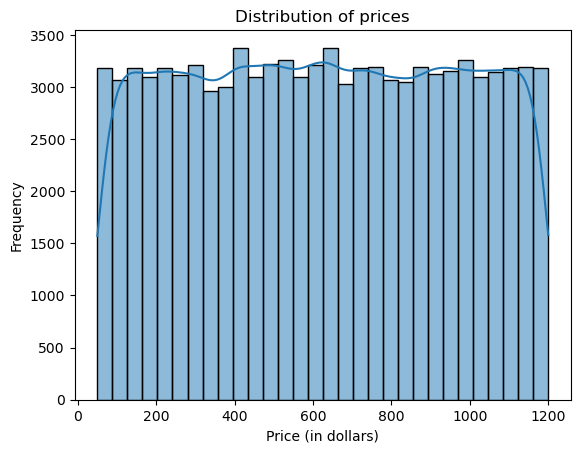

In [20]:
# Let's start with the price column to understand the distribution of prices.
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')
plt.show()

The distribution appears uniform; however, the highest concentration of prices generally peaks around 400 to 600 dollars.

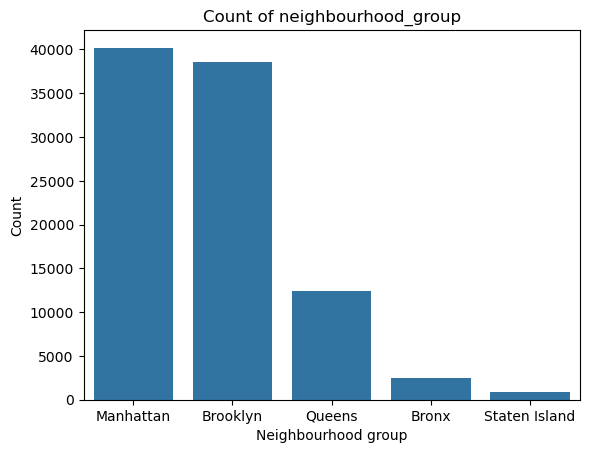

In [80]:
# Plot distribution of neighbourhood_group
sns.countplot(x='neighbourhood_group', data=data, order=data['neighbourhood_group'].value_counts(ascending=False).index)
plt.title('Count of neighbourhood_group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.show()

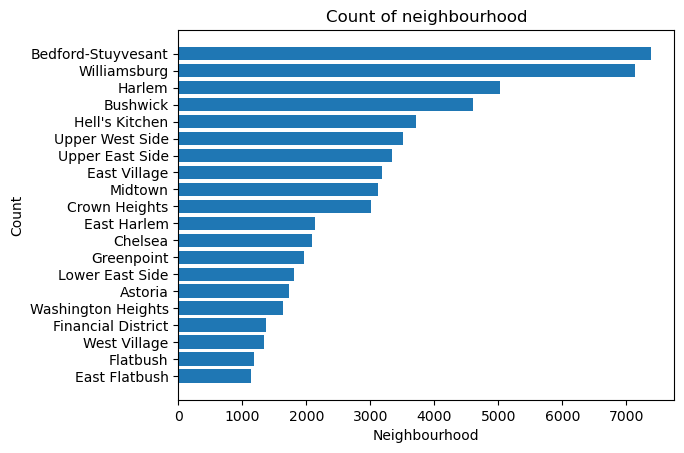

In [79]:
# Plot distribution of neighbourhood
most_neighbourhood = data.groupby('neighbourhood')['neighbourhood'].agg('count').sort_values(ascending=False).head(20)
plt.barh(most_neighbourhood.index, most_neighbourhood.values)
plt.title('Count of neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.gca().invert_yaxis()
plt.show()

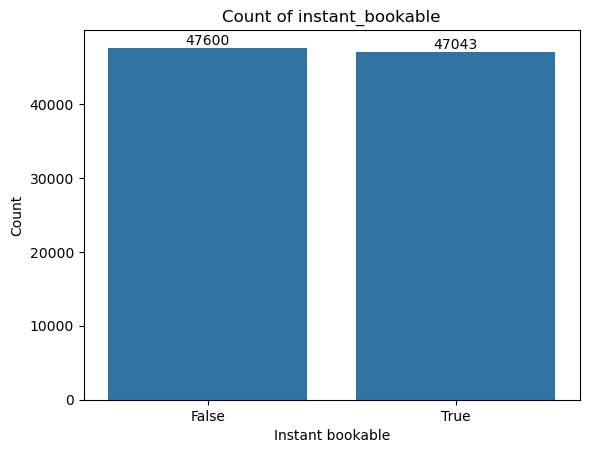

In [85]:
# Plot distribution of instant_bookable
ax = sns.countplot(x='instant_bookable', data=data)
plt.title('Count of instant_bookable')
plt.xlabel('Instant bookable')
plt.ylabel('Count')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

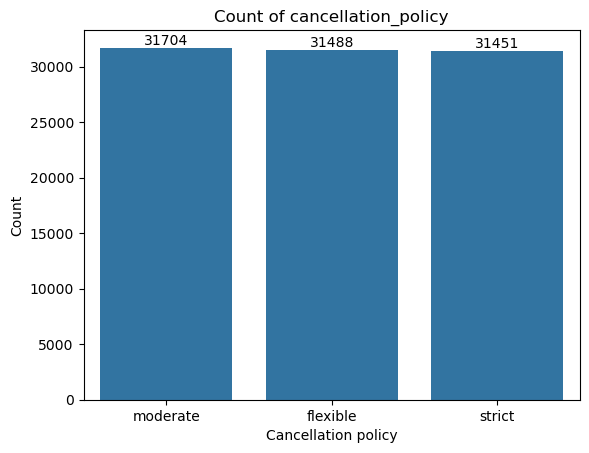

In [84]:
# Plot distribution of cancellation_policy
ax = sns.countplot(x='cancellation_policy', data=data, order=data['cancellation_policy'].value_counts(ascending=False).index)
plt.title('Count of cancellation_policy')
plt.xlabel('Cancellation policy')
plt.ylabel('Count')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

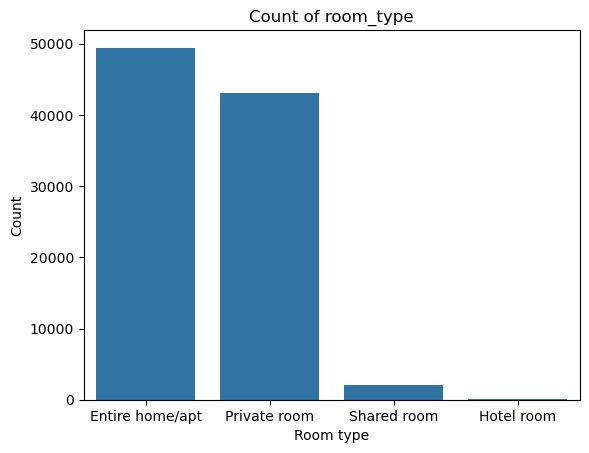

In [91]:
# Plot distribution of room_type
sns.countplot(x='room_type', data=data, order=data['room_type'].value_counts(ascending=False).index)
plt.title('Count of room_type')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()

The bar plot shows that the majority of Airbnb properties are located in Manhattan or Brooklyn. Most of the Airbnb properties are either entire homes/apartments or private rooms. The instant_bookable and cancellation_policy features are evenly distributed. However, we can further analyze whether these features correlate with other variables.